# Read data

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
data = pd.read_csv("data/2021.12.21_project_data.csv", sep="\t")
param = "PI - 16"
to_pred = "16-B"

In [51]:
booleans = ["zgrzytanie", "zaciskanie", "sztywnosc", "ograniczone otwieranie", "bol miesni", "przygryzanie", "cwiczenia", "szyna", "starcie-przednie", "starcie-boczne", "ubytki klinowe", "pekniecia szkliwa", "impresje jezyka", "linea alba", "przerost zwaczy", "tkliwosc miesni"]
interleukinas = ["Unnamed: 0",
            "Interleukina – 11B",
            "Interleukina – 11P",
            "Interleukina – 16B",
            "Interleukina – 16P",
            "Interleukina – 24B",
            "Interleukina – 24P",
            "Interleukina – 31B",
            "Interleukina – 31P",
            "Interleukina – 36B",
            "Interleukina – 36P",
            "Interleukina – 44B",
            "Interleukina – 44P"]


In [52]:
# self.data.dropna(inplace=True)
# print(data.describe())
# print(data.info())
# change str percentage columns to floats
data["API"] = data["API"].apply(lambda x: float(x.replace("%", "")) / 100)
data["SBI"] = data["SBI"].apply(lambda x: float(x.replace("%", "")) / 100)


In [53]:
data.drop(columns=booleans, axis=1, inplace=True)
data.drop(columns=interleukinas, axis=1, inplace=True)

In [54]:
gender_map = {
    "m": 0,
    "k": 1
}

# change gender data to numbers
data["plec"] = data["plec"].apply(lambda x: gender_map[x])

y_cols = ["16-B", "16-P", "11-B", "11-P", "24-B", "24-P", "36-B", "36-P", "31-B", "31-P", "44-B", "44-P"]
y = data[to_pred]


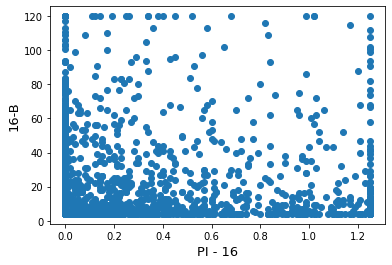


 mu = 19.63 and sigma = 24.44



/home/patryk/all/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


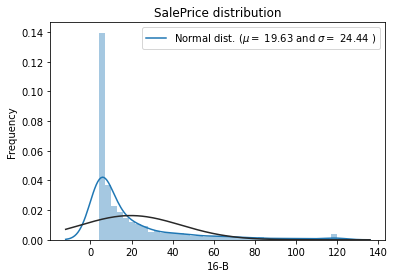

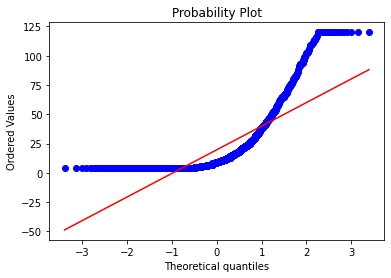

In [55]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
fig, ax = plt.subplots()

ax.scatter(x = data[param], y = data[to_pred])
plt.ylabel(to_pred, fontsize=13)
plt.xlabel(param, fontsize=13)
plt.show()
data[param].describe()
data[to_pred].describe()

sns.distplot(data[to_pred], fit=norm)
(mu, sigma) = norm.fit(data[to_pred])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data[to_pred], plot=plt)
plt.show()

do odrzucenia:
TWI
zgrzytanie
zaciskanie
sztywnosc
ograniczone otwieranie ???
bol miesni
przygryzanie
cwiczenia ???
szyna ???
starcie-przednie
starcie-boczne
ubytki klinowe
pekniecia 
impresje jezyka
linea alba
przerost zwaczy
tkliwosc miesni

/home/patryk/all/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 19.63 and sigma = 24.44



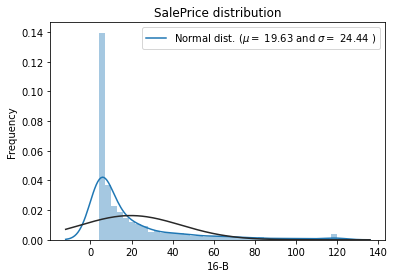

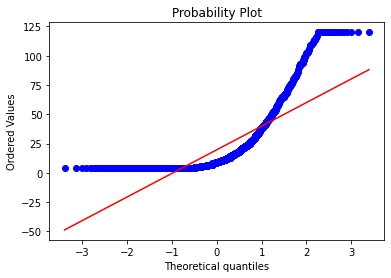

In [56]:
import numpy as np

# data[to_pred] = np.log1p(data[to_pred])

#Check the new distribution 
sns.distplot(data[to_pred] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data[to_pred])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data[to_pred], plot=plt)
plt.show()

Find most important features relative to target
16-B             1.000000
PI - 11          0.153651
PI - 36          0.140964
24-P             0.116193
PI - 16          0.102189
PPD - 44 P       0.095128
36-P             0.093667
11-B             0.070456
PPD - 24 P       0.058521
PPD - 11 P       0.057726
GI - 44          0.056446
PPD - 36 B       0.053736
GI - 11          0.052352
wiek             0.051804
PPD - 44 B       0.047001
GI - 36          0.038131
PI - 44          0.034673
GI - 31          0.029240
PI - 24          0.027977
PPD - 36 P       0.024594
PPD - 24 B       0.023588
SBI              0.021317
API              0.021054
44-P             0.016660
PPD - 31         0.016165
TWI - 36 suma    0.015379
PPD - 11         0.015149
PPD - 31 P       0.014210
11-P             0.012175
PPD - 11 B       0.008052
plec             0.006269
TWI - 24 suma    0.005357
PPD - 16 B       0.000936
31-B            -0.000841
GI - 16         -0.002862
24-B            -0.022210
GI - 24         

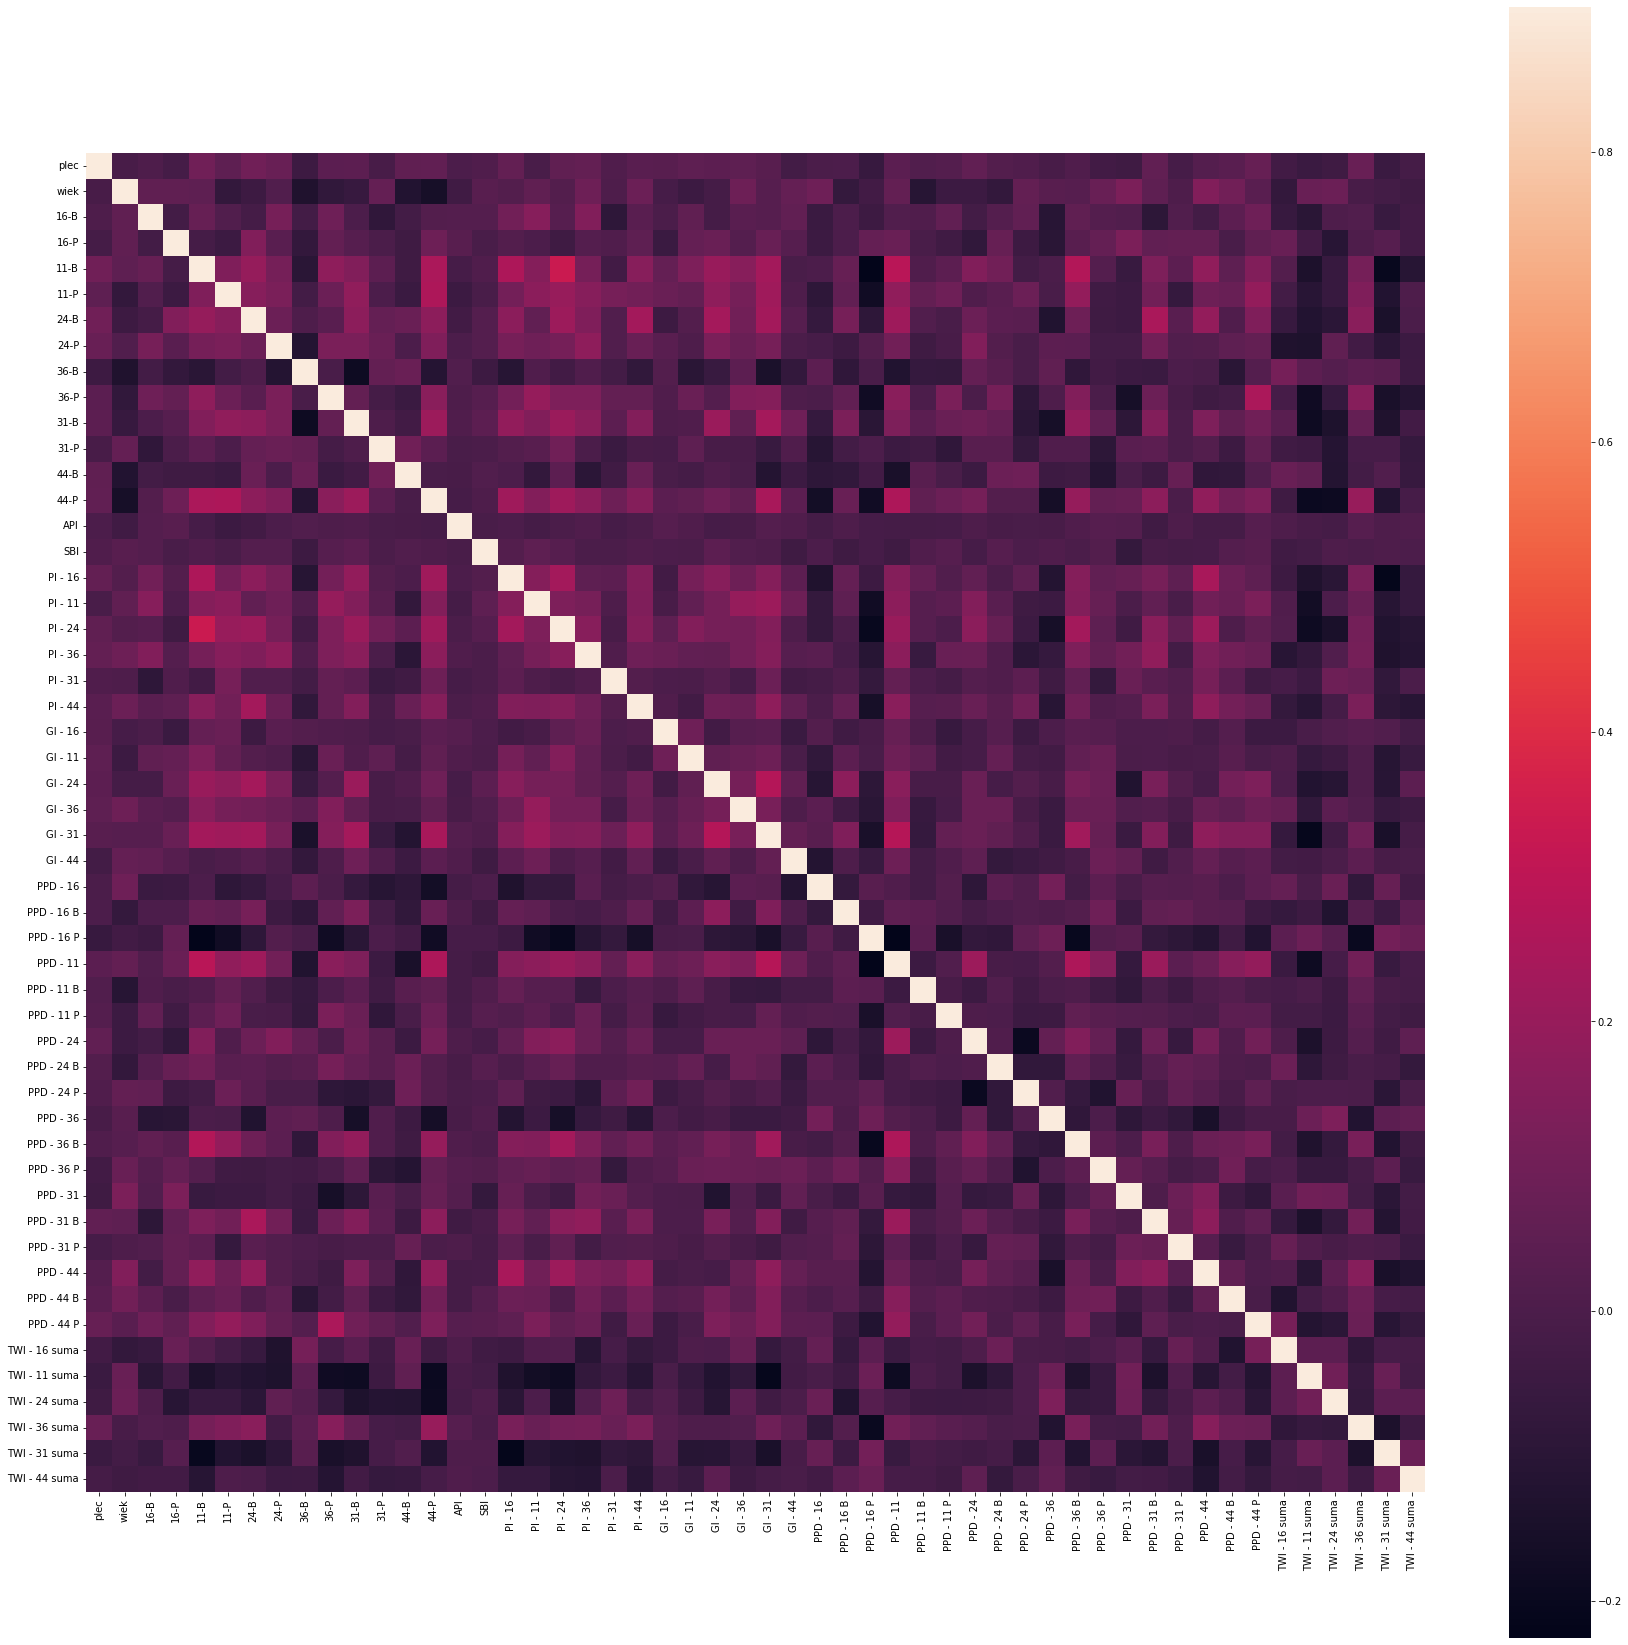

In [57]:
corrmat = data.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, vmax=0.9, square=True)
print("Find most important features relative to target")
corrmat.sort_values([to_pred], ascending = False, inplace = True)
print(corrmat[to_pred])

In [58]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(50)


Skew in numerical features: 



In [59]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)

There are 52 skewed numerical features to Box Cox transform


In [60]:
data.drop(columns=y_cols, axis=1, inplace=True)

In [61]:
data = pd.get_dummies(data)
print(data.shape)

(2000, 40)


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# data[to_pred] = np.log1p(data[to_pred])
# y_train = np.log1p(y_train)

0.05     13.193409
0.10     13.193409
0.30     13.193409
1.00     13.193409
3.00     13.193409
5.00     13.193409
10.00    13.193409
15.00    13.193409
30.00    13.193409
50.00    13.193409
75.00    13.193409
dtype: float64


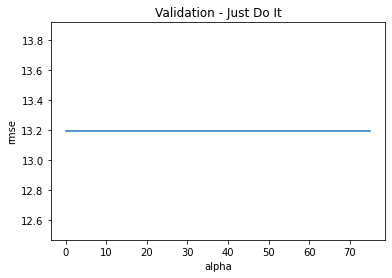

In [63]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, SGDRegressor

clf = SVR(kernel="linear")
# clf = LinearRegression()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
results = []

for alpha in alphas:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    results.append(mean_absolute_error(y_test, pred))
                   
results = pd.Series(results, index = alphas)
results.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")
print(results)
    # print("SVR score: ", mean_absolute_error(y_test, pred))
# for x, y in zip(y_test, pred):
#     print(f"{x} : {y}")
# print([(x, y) for x, y in zip(y_test, pred)])